In [ ]:
Requrements:
tensorflow
numpy
matplotlib

In [4]:
pip install tensorflow

In [6]:
pip install numpy

In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
from numpy import unique, argmax
import tensorflow
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [12]:
(x_train, y_train), (x_test, y_test) = load_data()
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [14]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

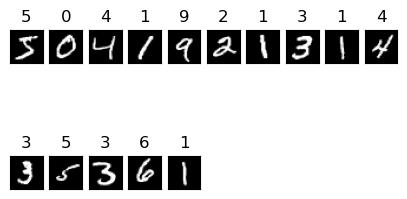

In [16]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
    ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap ='gray')
    ax.set_title(y_train[i])

In [18]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [20]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       600,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,702 (2.36 MB)

 Trainable params: 619,702 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 4s - 10ms/step - accuracy: 0.9229 - loss: 0.2498 - val_accuracy: 0.9842 - val_loss: 0.0596
Epoch 2/10
422/422 - 3s - 8ms/step - accuracy: 0.9744 - loss: 0.0832 - val_accuracy: 0.9865 - val_loss: 0.0441
Epoch 3/10
422/422 - 3s - 8ms/step - accuracy: 0.9812 - loss: 0.0601 - val_accuracy: 0.9892 - val_loss: 0.0375
Epoch 4/10
422/422 - 3s - 8ms/step - accuracy: 0.9848 - loss: 0.0484 - val_accuracy: 0.9902 - val_loss: 0.0320
Epoch 5/10
422/422 - 3s - 8ms/step - accuracy: 0.9870 - loss: 0.0405 - val_accuracy: 0.9925 - val_loss: 0.0289
Epoch 6/10
422/422 - 3s - 8ms/step - accuracy: 0.9877 - loss: 0.0364 - val_accuracy: 0.9917 - val_loss: 0.0277
Epoch 7/10
422/422 - 3s - 8ms/step - accuracy: 0.9894 - loss: 0.0318 - val_accuracy: 0.9932 - val_loss: 0.0253
Epoch 8/10
422/422 - 4s - 8ms/step - accuracy: 0.9911 - loss: 0.0283 - val_accuracy: 0.9907 - val_loss: 0.0299
Epoch 9/10
422/422 - 4s - 8ms/step - accuracy: 0.9913 - loss: 0.0272 - val_accuracy: 0.9927 - val_loss: 0.0254


In [25]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.26999807357788


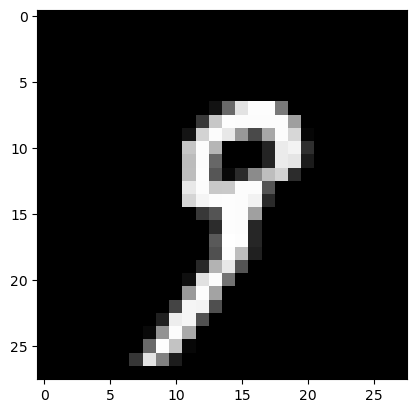

In [28]:
#change_number_inside_bracket
image = x_train[19]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [30]:
image = image.reshape(1, 28, 28, 1)
p = model.predict([image])
print('Predicted: {}'.format(argmax(p)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted: 9


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=('*',)
  warnings.warn(
